In [3]:
import numpy as np
import pandas as pd

In [4]:
dataset_path = '../../datasets/student_performance.csv'

In [5]:
df = pd.read_csv(dataset_path, delimiter=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
def two_str_value_to_int(df:pd.DataFrame, columns:list):
    for column in columns:
        # unique_values = list(df[column].unique())
        if 'yes' in list(df[column].unique()):
            unique_values = ['no', 'yes']
        # if len(unique_values) == 2:
            df[column] = df[column].apply(lambda x: unique_values.index(str(x).lower()))
    return df


In [7]:
str_columns = [
    "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", 
    "reason", "guardian", "schoolsup", "famsup", "paid", "activities", 
    "nursery", "higher", "internet", "romantic"
]

df = two_str_value_to_int(df, str_columns)
df[str_columns].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,1,0,0,0,1,1,0,0
1,GP,F,U,GT3,T,at_home,other,course,father,0,1,0,0,0,1,1,0
2,GP,F,U,LE3,T,at_home,other,other,mother,1,0,0,0,1,1,1,0
3,GP,F,U,GT3,T,health,services,home,mother,0,1,0,1,1,1,1,1
4,GP,F,U,GT3,T,other,other,home,father,0,1,0,0,1,1,0,0


In [8]:
for column in str_columns:
    print(f'column = {column} || unique values = {list(df[column].unique())}')


column = school || unique values = ['GP', 'MS']
column = sex || unique values = ['F', 'M']
column = address || unique values = ['U', 'R']
column = famsize || unique values = ['GT3', 'LE3']
column = Pstatus || unique values = ['A', 'T']
column = Mjob || unique values = ['at_home', 'health', 'other', 'services', 'teacher']
column = Fjob || unique values = ['teacher', 'other', 'services', 'health', 'at_home']
column = reason || unique values = ['course', 'other', 'home', 'reputation']
column = guardian || unique values = ['mother', 'father', 'other']
column = schoolsup || unique values = [np.int64(1), np.int64(0)]
column = famsup || unique values = [np.int64(0), np.int64(1)]
column = paid || unique values = [np.int64(0), np.int64(1)]
column = activities || unique values = [np.int64(0), np.int64(1)]
column = nursery || unique values = [np.int64(1), np.int64(0)]
column = higher || unique values = [np.int64(1), np.int64(0)]
column = internet || unique values = [np.int64(0), np.int64(1)]
colu

In [9]:
df = pd.get_dummies(df)

In [10]:
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f'Count before drop duplicates: {before}')
print(f'Count after drop duplicates: {after}')

Count before drop duplicates: 649
Count after drop duplicates: 649


| Nota (0 a 10) | Nota GPA (Escala de 4.0) | Nota Letra |
|---------------------|--------------------------|------------|
| 9.0 a 10.0          | 4.0                      | A          |
| 8.0 a 8.9           | 3.0 - 3.9                | B          |
| 7.0 a 7.9           | 2.0 - 2.9                | C          |
| 6.0 a 6.9           | 1.0 - 1.9                | D          |
| 0 a 5.9             | 0.0                      | F          |


In [11]:
df['G2'].unique()

array([11, 13, 14, 12, 16, 17,  8, 10, 15,  9,  7,  6, 18, 19,  0,  5])

In [12]:
df['GPA_result'] = df['G2'].apply(lambda x: 'PASS' if int(x)/5 >= 2 else 'FAIL')

In [13]:
# df = df.drop(columns=['G1', 'G2', 'G3'])

In [14]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [15]:
df.dtypes

age                   int64
Medu                  int64
Fedu                  int64
traveltime            int64
studytime             int64
failures              int64
schoolsup             int64
famsup                int64
paid                  int64
activities            int64
nursery               int64
higher                int64
internet              int64
romantic              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
school_GP              bool
school_MS              bool
sex_F                  bool
sex_M                  bool
address_R              bool
address_U              bool
famsize_GT3            bool
famsize_LE3            bool
Pstatus_A              bool
Pstatus_T              bool
Mjob_at_home           bool
Mjob_health         

In [16]:
columns = []
for c in df.columns:
    if c.startswith('Fjob'):
        columns.append(c)

df[columns].head()

,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,False,False,False,False,True
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,True,False,False


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def logs(model, y_test, X_test):
    # Predição
    y_pred = model.predict(X_test)

    # Matriz de confusão
    print('Matriz de Confusão')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
    disp.plot()

    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    print("Acurácia: {:.2f}".format(acc))

    # Precisão média ponderada
    prem = precision_score(y_true = y_test, y_pred = y_pred, average = "weighted")
    print("Precisão média ponderada: {:.2f}".format(prem))

    # Recall médio ponderado
    recm = recall_score(y_true = y_test, y_pred = y_pred, average = "weighted")
    print("Recall médio ponderado: {:.2f}".format(recm))

    # F1 
    f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 0)
    print("F1 (FAIL): {:.2f}".format(f1))
    # F1 
    f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
    print("F1 (PASS): {:.2f}".format(f1))

    # F1 médio ponderado
    f1m = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
    print("F1 médio ponderado: {:.2f}".format(f1m))



In [18]:
columns_to_X = [
    'age', # student's age (numeric: from 15 to 22)
    'Medu', # mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    'Fedu', # father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    'traveltime', # home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    'studytime', # weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    'failures', # number of past class failures (numeric: n if 1<=n<3, else 4)
    'schoolsup', # extra educational support (binary: yes or no)
    'famsup', # family educational support (binary: yes or no)
    'paid', # extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    'activities', # extra-curricular activities (binary: yes or no)
    'nursery', # attended nursery school (binary: yes or no)
    'higher', # wants to take higher education (binary: yes or no)
    'internet', # Internet access at home (binary: yes or no)
    'romantic', # with a romantic relationship (binary: yes or no)
    'famrel', # quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    'freetime', # free time after school (numeric: from 1 - very low to 5 - very high)
    'goout', # going out with friends (numeric: from 1 - very low to 5 - very high)
    # 'Dalc', # workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    # 'Walc', # weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    'health', # current health status (numeric: from 1 - very bad to 5 - very good)
    'absences', # number of school absences (numeric: from 0 to 93)
    # 'G1', # first period grade (numeric: from 0 to 20)
    # 'G2', # second period grade (numeric: from 0 to 20)
    # 'G3', # final grade (numeric: from 0 to 20, output target)
    'school_GP', # student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    'school_MS', # student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    'sex_F', # student's sex (binary: 'F' - female or 'M' - male)
    'sex_M', # student's sex (binary: 'F' - female or 'M' - male)
    'address_R', # student\'s home address type (binary: 'U' - urban or 'R' - rural)
    'address_U', # student\'s home address type (binary: 'U' - urban or 'R' - rural)
    'famsize_GT3', # family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    'famsize_LE3', # family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    'Pstatus_A', # parent\'s cohabitation status (binary: 'T' - living together or 'A' - apart)
    'Pstatus_T', # parent\'s cohabitation status (binary: 'T' - living together or 'A' - apart)
    'Mjob_at_home', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_health', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_other', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_services', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_teacher', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_at_home', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_health', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_other', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_services', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_teacher', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'reason_course', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_home', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_other', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_reputation', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'guardian_father', # student\'s guardian (nominal: 'mother', 'father' or 'other')
    'guardian_mother', # student\'s guardian (nominal: 'mother', 'father' or 'other')
    'guardian_other', # student\'s guardian (nominal: 'mother', 'father' or 'other')
]


In [19]:
X = df[columns_to_X]
y = df['GPA_result'].map({'PASS':1, 'FAIL':0})
# y = y.map({'PASS':1, 'FAIL':0})

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(
    hidden_layer_sizes=(200, 100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    # power_t=0.5,
    max_iter=5000,
    shuffle=True,
    random_state=1,
    # tol=0.0001,
    # verbose=False,
    # warm_start=False,
    # momentum=0.9,
    # nesterovs_momentum=True,
    # early_stopping=False,
    # validation_fraction=0.1,
    # beta_1=0.9,
    # beta_2=0.999,
    # epsilon=1e-8,
    # n_iter_no_change=10,
    max_fun=15000
)

model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=5000, random_state=1)

Matriz de Confusão
Acurácia: 0.80
Precisão média ponderada: 0.79
Recall médio ponderado: 0.80
F1 (FAIL): 0.50
F1 (PASS): 0.88
F1 médio ponderado: 0.79


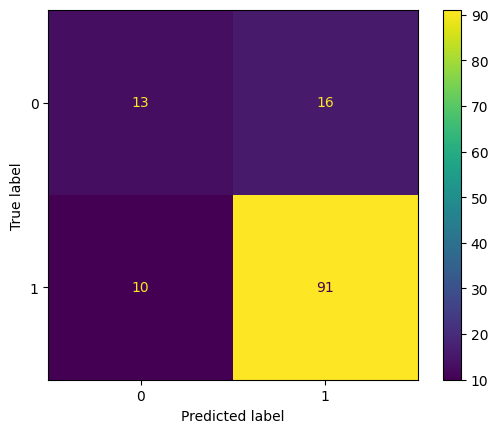

In [22]:
logs(model=model, y_test=y_test, X_test=X_test)

In [38]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(
    hidden_layer_sizes=(84, 42, 21),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    # power_t=0.5,
    max_iter=5000,
    shuffle=True,
    random_state=1,
    # tol=0.0001,
    # verbose=False,
    # warm_start=False,
    # momentum=0.9,
    # nesterovs_momentum=True,
    # early_stopping=False,
    # validation_fraction=0.1,
    # beta_1=0.9,
    # beta_2=0.999,
    # epsilon=1e-8,
    # n_iter_no_change=10,
    max_fun=10000
)

model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(84, 42, 21), learning_rate='adaptive',
              max_fun=10000, max_iter=5000, random_state=1)

Matriz de Confusão
Acurácia: 0.75
Precisão média ponderada: 0.74
Recall médio ponderado: 0.75
F1 (FAIL): 0.38
F1 (PASS): 0.85
F1 médio ponderado: 0.74


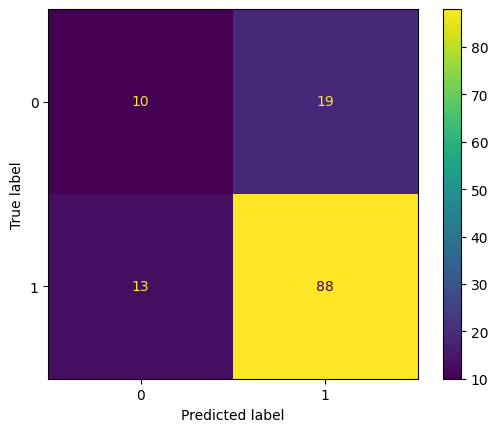

In [39]:
logs(model=model, y_test=y_test, X_test=X_test)

In [46]:
columns_to_X = [
    'age', # student's age (numeric: from 15 to 22)
    'Medu', # mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    'Fedu', # father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    'traveltime', # home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    'studytime', # weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    'failures', # number of past class failures (numeric: n if 1<=n<3, else 4)
    'schoolsup', # extra educational support (binary: yes or no)
    'famsup', # family educational support (binary: yes or no)
    'paid', # extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    'activities', # extra-curricular activities (binary: yes or no)
    'nursery', # attended nursery school (binary: yes or no)
    'higher', # wants to take higher education (binary: yes or no)
    'internet', # Internet access at home (binary: yes or no)
    'romantic', # with a romantic relationship (binary: yes or no)
    'famrel', # quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    'freetime', # free time after school (numeric: from 1 - very low to 5 - very high)
    'goout', # going out with friends (numeric: from 1 - very low to 5 - very high)
    # 'Dalc', # workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    # 'Walc', # weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    'health', # current health status (numeric: from 1 - very bad to 5 - very good)
    'absences', # number of school absences (numeric: from 0 to 93)
    # 'G1', # first period grade (numeric: from 0 to 20)
    # 'G2', # second period grade (numeric: from 0 to 20)
    # 'G3', # final grade (numeric: from 0 to 20, output target)
    'school_GP', # student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    'school_MS', # student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    'sex_F', # student's sex (binary: 'F' - female or 'M' - male)
    'sex_M', # student's sex (binary: 'F' - female or 'M' - male)
    'address_R', # student\'s home address type (binary: 'U' - urban or 'R' - rural)
    'address_U', # student\'s home address type (binary: 'U' - urban or 'R' - rural)
    'famsize_GT3', # family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    'famsize_LE3', # family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    'Pstatus_A', # parent\'s cohabitation status (binary: 'T' - living together or 'A' - apart)
    'Pstatus_T', # parent\'s cohabitation status (binary: 'T' - living together or 'A' - apart)
    'Mjob_at_home', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_health', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_other', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_services', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Mjob_teacher', # mother\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_at_home', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_health', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_other', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_services', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'Fjob_teacher', # father\'s job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    'reason_course', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_home', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_other', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'reason_reputation', # reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    'guardian_father', # student\'s guardian (nominal: 'mother', 'father' or 'other')
    'guardian_mother', # student\'s guardian (nominal: 'mother', 'father' or 'other')
    'guardian_other', # student\'s guardian (nominal: 'mother', 'father' or 'other')
]


In [47]:
X = df[columns_to_X]
y = df['GPA_result'].map({'PASS':1, 'FAIL':0})
# y = y.map({'PASS':1, 'FAIL':0})

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    # activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    # power_t=0.5,
    max_iter=5000,
    shuffle=True,
    random_state=1,
    # tol=0.0001,
    # verbose=False,
    # warm_start=False,
    # momentum=0.9,
    # nesterovs_momentum=True,
    # early_stopping=False,
    # validation_fraction=0.1,
    # beta_1=0.9,
    # beta_2=0.999,
    # epsilon=1e-8,
    # n_iter_no_change=10,
    max_fun=15000
)

model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=5000, random_state=1)

Matriz de Confusão
Acurácia: 0.75
Precisão média ponderada: 0.75
Recall médio ponderado: 0.75
F1 (FAIL): 0.44
F1 (PASS): 0.84
F1 médio ponderado: 0.75


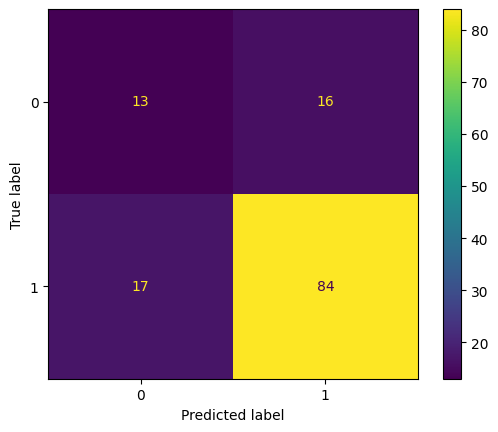

In [50]:
logs(model=model, y_test=y_test, X_test=X_test)

In [33]:
# import joblib

In [34]:
# joblib.dump(model, 'house_price_linear_regression_model.pkl')